In [18]:
import scipy.io
import numpy as np
from torchAA import torchAA
import matplotlib.pyplot as plt
import torch

In [2]:
import sys

sys.path.append('../..')

# from torchNMF import NMF
from helpers.callbacks import explained_variance, ChangeStopper, EarlyStop
from helpers.initializers import FurthestSum
from helpers.callbacks import EarlyStop

C:\Users\lucas\AppData\Local\Temp/ipykernel_25940/231169501.py:14: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  plt.plot(X[[np.all(x == [100, 0, 0]) for x in targets]][0])


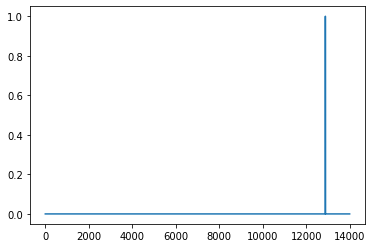

In [42]:
# load data from .MAT file
mat = scipy.io.loadmat('../../helpers/data/NMR_mix_DoE.mat')

# Get X and Labels. Probably different for the other dataset, but i didn't check :)
X = mat.get('xData')
targets = mat.get('yData')
target_labels = mat.get('yLabels')
axis = mat.get("Axis")

# plt.plot(X[[np.all(x == [100, 0, 0]) for x in targets]][0])
#softmax X across features
softmax = torch.nn.Softmax(dim=1)
X = softmax(torch.tensor(X, dtype=torch.float32))
plt.plot(X[[np.all(x == [100, 0, 0]) for x in targets]][0])
plt.show()

In [4]:
FurthestSum(X, 3, 1)

array([12846, 12883, 13862], dtype=int64)

In [5]:
# mat = scipy.io.loadmat('../../helpers/data/nmrdata_Oil_group3.mat')

# #Get X and Labels. Probably different for the other dataset, but i didn't check :)
# mat = mat.get('nmrdata_Oil_group3')
# X = mat[0][0][0]
# labels = mat[0][0][1]



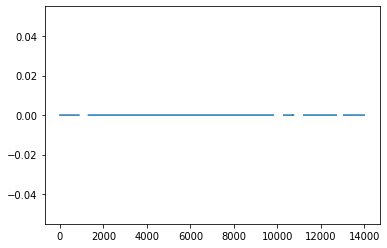

In [12]:
plt.plot(X[[np.all(x == [35, 35, 30]) for x in targets]][0])

In [7]:

# Fit NMF and AA 10 times and get an average loss curve for each as well as an average explained variance
max_components = 4
aa_explained = []
nmf_explained = []
for i in range(max_components):
    print(F"Components: {i+1}", end="\n")
    # nmf = NMF(X, i+1)
    aa = torchAA(X.T, rank = i+1, initializer="fs")
    # nmf.fit(verbose=True, stopper=EarlyStop())
    aa.fit(verbose=True, stopper=ChangeStopper(patience=250))
    # nmf_explained.append(explained_variance(X, nmf.forward().detach().numpy()))
    aa_explained.append(explained_variance(X.T, aa.forward().detach().numpy()))

Components: 1
3
1


c:\Users\lucas\Documents\UNI\fagprojekt\02466Fagprojekt2023\Visualizations\AA\torchAA.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.C = torch.tensor(self.C, requires_grad=True)


Components: 2ss: 9643590075705.893
3
2
Components: 3oss: 4729712057635.455
3
3


KeyboardInterrupt: 

In [ ]:
print(X.T.shape)
torch.soft

(14000, 231)


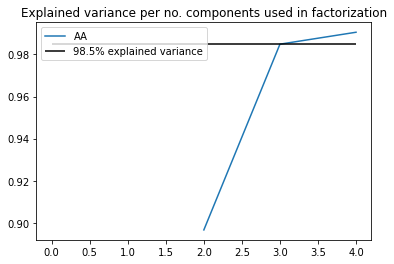

In [ ]:
plt.figure()
# plt.plot(np.arange(1, max_components+1), nmf_explained, label="NMF")
plt.plot(np.arange(2, max_components+1), aa_explained[1:], label="AA")
plt.hlines(0.985, 0, max_components, label="98.5% explained variance", color="black")
plt.title("Explained variance per no. components used in factorization")
plt.legend()
plt.show()

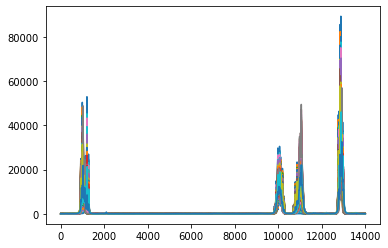

In [ ]:
plt.plot(X.T)
plt.show()